In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
path_df = "../04_Feature_Engineering/"

#Lectura del df del modelo
with (open(path_df+'dfmodelo.pickle',"rb")) as openfile:
    df = pickle.load(openfile)


In [3]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['filtered_words_lemm'],df['toxico'],test_size=0.2)

In [4]:
np.random.seed(500)

# Word Vectorization

Uno de los procesos comunes en tareas NLP es la conversión de una colección de documentos de texto en vectores de características numéricas que la máquina pueda entender. El método más popular se llama TF-IDF, su significado es "Frecuencia de Término - Frecuencia del Documento Inverso", que son los valores que finalmente se asignan a cada palabra.

Frecuencia de término: Cuanto aparece la palabra en ese documento.

Frecuencia de documentos inversa: esta escala reduce las palabras que aparecen mucho en los documentos.

fuente: https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34

Dependiendo del término max_features podemos indicar el número de palabras a tener en cuenta. 

In [5]:
df.loc[38,'filtered_words']


['asco',
 'periodismo',
 'cadena',
 'perroflauta',
 'miserables',
 'personajes',
 '😠',
 '😡',
 '😠']

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer 


def identity_tokenizer(text):
    return text

Tfidf_vect = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False,max_features=7000)  
Tfidf_vect.fit(df.loc[:,'filtered_words'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

print(Tfidf_vect.vocabulary_)


{'toda': 2810, 'gente': 1285, 'alcasser': 135, 'daba': 759, 'ostias': 2041, 'hablando': 1350, 'mal': 1742, 'programa': 2321, 'no': 1964, 'decirlos': 794, 'familiares': 1162, 'shock': 2630, 'darian': 764, 'cuenta': 740, 'haciendo': 1365, 'tiempo': 2783, 'debieron': 787, 'abrir': 69, 'ojos': 2009, 'sentir': 2606, 'aun': 274, 'mas': 1787, 'impotencia': 1479, 'respeto': 2476, 'carabinero': 471, 'potente': 2272, 'sabe': 2534, 'ahogadillas”': 117, 'playa': 2210, 'eramos': 1049, 'chicos': 543, 'mar': 1770, 'quedao': 2378, 'dia': 874, 'perroflauta': 2161, 'jajajajajajaja': 1563, 've': 2940, 'aqui': 223, 'abrazo': 65, 'cabestro': 398, 'dos': 936, 'fotos': 1225, 'juntas': 1593, 'entienden': 1028, 'mejor': 1805, 'mangurrian': 1762, '-desde': 27, 'myra': 1918, 'decidido': 788, 'ignorar': 1455, 'fantasmas': 1166, 'tocapelotas-': 2806, 'narro': 1927, 'perez': 2151, 'reverte': 2490, 'leer': 1636, 'sabes': 2539, 'callate': 426, 'bot': 364, 'hermanos': 1384, 'equilibristas': 1045, 'nik': 1950, 'lijana'

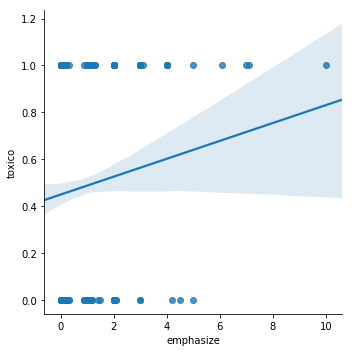

In [7]:
#vemos la dependencia entre dos variables con el modelo de regressión lineal 
import seaborn as sns
sns.lmplot(x = "emphasize", y = "toxico", data = df)


In [8]:
print("Size Train_X = {} \nSize Test_X={}".format(Train_X.size, Test_X.size)) 
print("Size Train_Y = {} \nSize Test_Y={}".format(Train_Y.size, Test_Y.size)) 

Size Train_X = 564 
Size Test_X=141
Size Train_Y = 564 
Size Test_Y=141


# Naive_bayes

In [9]:
# Entrenamos los datos de training en el clasificador Naive Bayes
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# Predecimos los valores de toxicidad en el modelo de validación insertadop
predictions_NB = Naive.predict(Test_X_Tfidf)

print("Accuracy Score",accuracy_score(predictions_NB, Test_Y)*100)

Accuracy Score 90.0709219858156


In [10]:
print(classification_report(Test_Y,predictions_NB))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        71
           1       0.91      0.89      0.90        70

   micro avg       0.90      0.90      0.90       141
   macro avg       0.90      0.90      0.90       141
weighted avg       0.90      0.90      0.90       141



In [11]:
#MATRIZ DE CONFUSIÓN
cnf_matrix = confusion_matrix(Test_Y,predictions_NB)
print(cnf_matrix)

[[65  6]
 [ 8 62]]


### Dibujo de la matiz de confusión

Text(0.5,257.44,'Valor predicho')

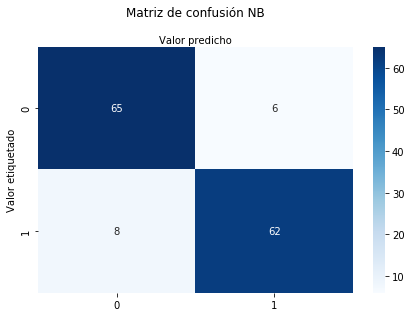

In [12]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión NB', y=1.1)
plt.ylabel('Valor etiquetado')
plt.xlabel('Valor predicho')

# Classifier - Algorithm - SVM

In [13]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Accuracy Score ",accuracy_score(predictions_SVM, Test_Y)*100)

Accuracy Score  89.36170212765957


In [14]:
print(classification_report(Test_Y,predictions_SVM))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        71
           1       0.91      0.87      0.89        70

   micro avg       0.89      0.89      0.89       141
   macro avg       0.89      0.89      0.89       141
weighted avg       0.89      0.89      0.89       141



In [15]:
#MATRIZ DE CONFUSIÓN
cnf_matrix = confusion_matrix(Test_Y,predictions_SVM)
print(cnf_matrix)

[[65  6]
 [ 9 61]]


### Dibujo de la matiz de confusión

Text(0.5,257.44,'Valor predicho')

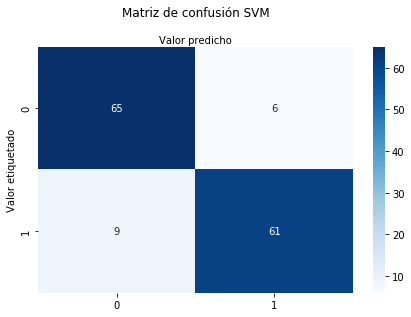

In [16]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión SVM', y=1.1)
plt.ylabel('Valor etiquetado')
plt.xlabel('Valor predicho')

# Random Forest

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.metrics import roc_curve, auc, roc_auc_score

kappa_scorer = make_scorer(cohen_kappa_score)

from sklearn.ensemble import RandomForestClassifier
#grid the serarch best model
# Set the parameters by cross-validation
# Number of trees in random forest
n_estimators = [10, 50, 100, 200, 500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5, 10, 15, 20]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


tuned_parameters = {'n_estimators': n_estimators,
                    'max_features':max_features,
                   'max_depth': max_depth }

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,
                       scoring=kappa_scorer)

clf.fit(Train_X_Tfidf,Train_Y)

print("Best parameters set found on development set:")
print(clf.best_params_)
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
    

print("PREDICCIONES EXTERNAS")
predicciones = clf.predict(Test_X_Tfidf)
probabilidades = clf.predict_proba(Test_X_Tfidf)

print("Estadístico Kappa: "+str(cohen_kappa_score(Test_Y, predicciones)))
print("Estadístico AUC: "+str(roc_auc_score(Test_Y, probabilidades[:,1])))
print("Estadístico Exactitud: "+str(accuracy_score( Test_Y, predicciones)))


C:\Users\Esperanza\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:
{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
Grid scores on development set:
0.301 (+/-0.259) for {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 10}
0.370 (+/-0.223) for {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50}
0.322 (+/-0.167) for {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}
0.370 (+/-0.203) for {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
0.367 (+/-0.224) for {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
0.328 (+/-0.217) for {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 10}
0.349 (+/-0.255) for {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50}
0.360 (+/-0.194) for {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
0.370 (+/-0.163) for {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
0.362 (+/-0.236) for {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}
0.437 (+/-0.241) for {'max_depth'

[[68  3]
 [19 51]]


Text(0.5,257.44,'Valor predicho')

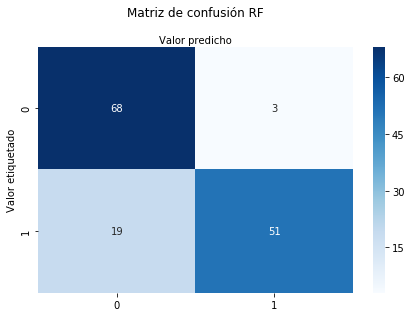

In [28]:
#MATRIZ DE CONFUSIÓN
cnf_matrix = confusion_matrix(Test_Y,predicciones)
print(cnf_matrix)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión RF', y=1.1)
plt.ylabel('Valor etiquetado')
plt.xlabel('Valor predicho')

# Juntando ambos modelos

In [29]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[ ('svm', SVM), ('NB', Naive),('CLF', clf)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [30]:
#fit model to training data
ensemble.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_ensemble= ensemble.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
#print("Accuracy Score ",accuracy_score(predictions_ensemble, Test_Y)*100)

C:\Users\Esperanza\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
#MATRIZ DE CONFUSIÓN
cnf_matrix = confusion_matrix(Test_Y,predictions_ensemble)
print(cnf_matrix)

[[66  5]
 [ 9 61]]


Text(0.5,257.44,'Valor predicho')

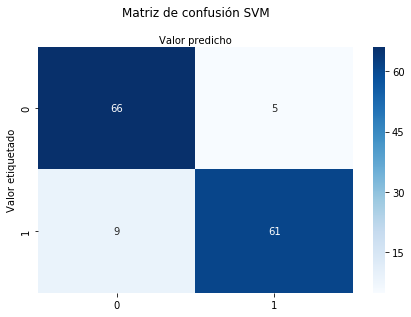

In [32]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión SVM', y=1.1)
plt.ylabel('Valor etiquetado')
plt.xlabel('Valor predicho')